## Exploring unsupervised machine learning
## Rahul Kumar Raman
## 10/09/20

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

### Load the iris dataset

In [6]:
iris=datasets.load_iris()
iris_ds=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_ds.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
x=iris_ds.iloc[:,[0,1,2,3]].values
sse = []
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
sse

[680.82439999999997,
 152.368706477339,
 78.940841426146079,
 57.344923809523856,
 46.550572672672715,
 38.957011157119808,
 34.190687924796606,
 29.955568877177548,
 28.111711988304091]

### As you can see the cahange in sse is not changing a lot after the third value, so we can say our k is most probably 3 but for surity we can go for elbow method too

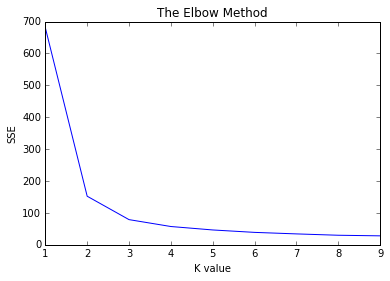

In [20]:
plt.plot(range(1,10),sse)
plt.title('The Elbow Method')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.show()

### After looking at the Elbow graph we can confirm that the elbow is present at 3, after k=3 no drastic change can be observed so concluding that our k=3.

In [22]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(x)

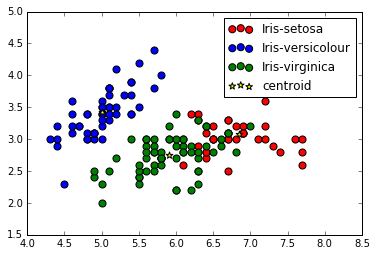

In [27]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
           s=50,c='yellow',label='centroid',marker='*')
plt.legend()

### Here's our required KMeans plot with the required number of clusters
### Thank You